# KNN for COVID-19 ML Project
## By:
### Abdel-Rahman Ibrahim El Said Ahmed Megahed  18P7423
### Youssef Mohamed Mostafa Mansi                           18P5848

In [1]:
#required imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [2]:
#load data into pandas dataframe
df = pd.read_csv('data.csv', index_col = 0)

In [3]:
#Top 10 most repeated locations in the data for one hot encoding
top_10_loc = [x for x in df.location.value_counts().sort_values(ascending = False).head(10).index]
top_10_loc

[108, 45, 44, 114, 110, 106, 99, 116, 85, 117]

In [4]:
#optimizing the dataframe to show data
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
#One Hot Encoding the locations
for label in top_10_loc:
    df["L" + str(int(label))] = np.where(df['location']==label,1,0)

In [5]:
#Top 10 most repeated countries in the data for one hot encoding
top_10_country = [y for y in df.country.value_counts().sort_values(ascending = False).head(10).index]
top_10_country

[18, 8, 13, 24, 12, 29, 11, 28, 25, 23]

In [6]:
#One Hot Encoding the countries
for label in top_10_country:
    df["C"+str(int(label))] = np.where(df['country']==label,1,0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
#dropping the country & location columns
df = df.drop(['country'],axis=1)
df = df.drop(['location'],axis=1)
df

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23
0,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2,24.0,0,0,14,31,19,12,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
859,2,35.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#dropping then adding the result column to the end of the dataset
res_df = df['result']
res_df
df = df.drop(['result'],axis=1)
df['result']= res_df
df

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,L108,L45,L44,L114,L110,L106,L99,L116,L85,L117,C18,C8,C13,C24,C12,C29,C11,C28,C25,C23,result
0,1,66.0,1,0,14,31,19,12,3,1,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2,24.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
859,2,35.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
861,1,49.4,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#split dataset
X = df.iloc[:, 0:31]
y = df.iloc[:, -1]
X_train , X_test, y_train , y_test = train_test_split(X,y, random_state = 3 , test_size = 0.2,shuffle = True)

In [10]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

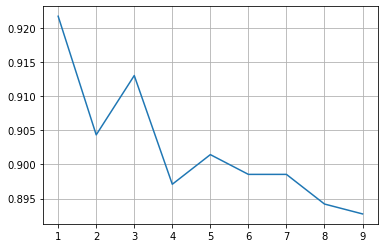

best_K = 1 


In [11]:
#determine best k
scores = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(np.mean(score))
    
plt.plot(range(1,10),scores)
plt.grid()
plt.show()

best_K = scores.index(max(scores)) + 1
print(f"{best_K = } ")

In [12]:
#model definition
classifier = KNeighborsClassifier(n_neighbors= best_K, p=2, metric='euclidean')

In [13]:
#fit model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [14]:
#Calculating predication values of Y using the model
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

Text(0.5, 257.44, 'Predicted label')

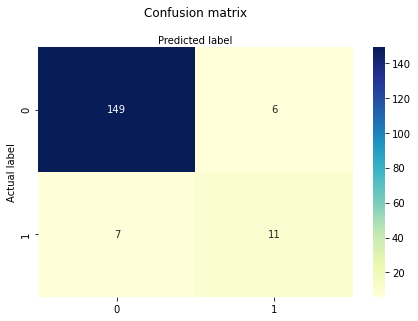

In [15]:
#Confusion matrix for True/False positives,True/False negatives
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#Confusion Matrix plotting
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
#Accuracy,precision and recall scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9248554913294798
Precision: 0.6470588235294118
Recall: 0.6111111111111112


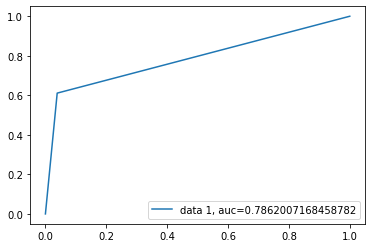

In [17]:
#Roc_AUC score & Plotting
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()